In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import seaborn as sns
import tifffile
from PIL import Image
import statistics
import shutil

In [2]:
exp_dir = r"E:\ExperimentData\Imaging\2025_05_30_CALORIMETRIC_EXP\Images"
config_file = r"F:\Work\Colorimetry\Analysis.xlsx"
out_path = r"F:\Work\Colorimetry\30_05_2025_Results"
data = pd.read_excel(config_file, sheet_name = "30_05_2025_Exp")

In [7]:
os.makedirs(out_path, exist_ok=True)
for folder in os.listdir(exp_dir):
    file_path = exp_dir + "/" + folder + "/" + "TIFF" + "/" + "Ref.tif"
    print(file_path)
    if os.path.exists(file_path):
        print(True)
        shutil.copy(file_path, out_path + "/" + folder + ".tif")

E:\ExperimentData\Imaging\2025_05_30_CALORIMETRIC_EXP\Images/005/TIFF/Ref.tif
E:\ExperimentData\Imaging\2025_05_30_CALORIMETRIC_EXP\Images/006/TIFF/Ref.tif
True
E:\ExperimentData\Imaging\2025_05_30_CALORIMETRIC_EXP\Images/007/TIFF/Ref.tif
True
E:\ExperimentData\Imaging\2025_05_30_CALORIMETRIC_EXP\Images/008/TIFF/Ref.tif
True
E:\ExperimentData\Imaging\2025_05_30_CALORIMETRIC_EXP\Images/009/TIFF/Ref.tif
True
E:\ExperimentData\Imaging\2025_05_30_CALORIMETRIC_EXP\Images/010/TIFF/Ref.tif
True
E:\ExperimentData\Imaging\2025_05_30_CALORIMETRIC_EXP\Images/011/TIFF/Ref.tif
True
E:\ExperimentData\Imaging\2025_05_30_CALORIMETRIC_EXP\Images/012/TIFF/Ref.tif
True
E:\ExperimentData\Imaging\2025_05_30_CALORIMETRIC_EXP\Images/013/TIFF/Ref.tif
True
E:\ExperimentData\Imaging\2025_05_30_CALORIMETRIC_EXP\Images/014/TIFF/Ref.tif
True
E:\ExperimentData\Imaging\2025_05_30_CALORIMETRIC_EXP\Images/015/TIFF/Ref.tif
True
E:\ExperimentData\Imaging\2025_05_30_CALORIMETRIC_EXP\Images/016/TIFF/Ref.tif
True
E:\Experi

In [8]:
data['Sample'] = data['Sample'].apply(lambda x: x.replace("_", ""))
data

,Sample,Molar,Dye,Timing,Black level,b,g,r
0,005,NaN,NaN,NaN,0,NaN,NaN,NaN
1,006,10.0,0.0,0.0,0,127.29,179.37,124.24
2,007,10.0,200.0,0.0,0,0.00,69.28,107.47
3,008,1.0,200.0,0.0,0,0.00,66.44,1.19
4,009,1.0,200.0,2.0,0,0.00,95.04,87.65


# Crop Images

In [7]:
# data['coords'] = data[['x','y','w','h']].apply(list, axis=1)

In [ ]:
# coords_dict = data.set_index('Sample')['coords'].to_dict()

In [ ]:
# for folder in os.listdir(exp_dir):
#     folder_path = exp_dir + "/" + folder
#     for file in os.listdir(folder_path):
#         x, y, w, h = coords_dict[folder]
#         im = Image.open(folder_path + "/" + file)
#         img_array = np.array(im)
#         rgb_image = img_array[y:y+h, x:x+w, :3]
#         out_file_path = out_path + "/" + folder
#         if not os.path.exists(out_file_path):
#             os.mkdir(out_file_path)
#         cv2.imwrite(out_file_path + "/" + file.split(".")[0] + ".jpg", cv2.cvtColor(rgb_image, cv2.COLOR_RGB2BGR))
#     print(f"Folder {folder} is completed..")

In [8]:
data.head()

,Sample,Molar,Dye,Timing,Black level,x,y,w,h,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,coords
0,006,No Sample,NaN,NaN,128,941,517,99,329,NaN,NaN,NaN,NaN,"[941, 517, 99, 329]"
1,007,10,0.0,0.0,128,934,703,95,148,NaN,NaN,NaN,NaN,"[934, 703, 95, 148]"
2,008,10,300.0,0.0,128,893,682,100,169,NaN,NaN,NaN,NaN,"[893, 682, 100, 169]"
3,009,10,300.0,2.0,128,893,682,100,169,NaN,NaN,NaN,NaN,"[893, 682, 100, 169]"
4,010,1,300.0,0.0,128,915,639,95,215,NaN,NaN,NaN,NaN,"[915, 639, 95, 215]"


In [10]:
initial_samples = data[(data['Timing'] == 0)]
initial_samples

,Sample,Molar,Dye,Timing,Black level,b,g,r
1,006,10.0000,0.0,0.0,0,127.29,179.37,124.24
2,007,10.0000,200.0,0.0,0,0.00,69.28,107.47
3,008,1.0000,200.0,0.0,0,0.00,66.44,1.19
5,010,0.1000,200.0,0.0,0,0.02,14.89,0.13
7,012,0.0100,200.0,0.0,0,0.67,0.71,0.28
9,014,0.0010,200.0,0.0,0,0.00,44.08,24.80
11,016,0.0001,200.0,0.0,0,13.55,77.59,57.66
17,022,0.0001,300.0,0.0,128,76.12,100.90,104.02
18,023,0.0001,300.0,0.0,0,0.00,40.38,49.00
19,024,0.0010,300.0,0.0,128,60.13,79.08,87.84


In [11]:
res_df = initial_samples[['Sample', 'Molar', 'Dye']]
res_df.head()

,Sample,Molar,Dye
1,006,10.00,0.0
2,007,10.00,200.0
3,008,1.00,200.0
5,010,0.10,200.0
7,012,0.01,200.0


In [14]:
def plot_hist(channels,title = ''):
    plt.figure(figsize=(12,4)).suptitle(title)
    plt.subplot(1,3,1)
    plt.hist(channels[0].flatten(), bins=100)
    plt.title('R Channel')
    plt.subplot(1,3,2)
    plt.hist(channels[1].flatten(), bins=100)
    plt.title('G Channel')
    plt.subplot(1,3,3)
    plt.hist(channels[2].flatten(), bins=100)
    plt.title('B Channel')
    plt.show()

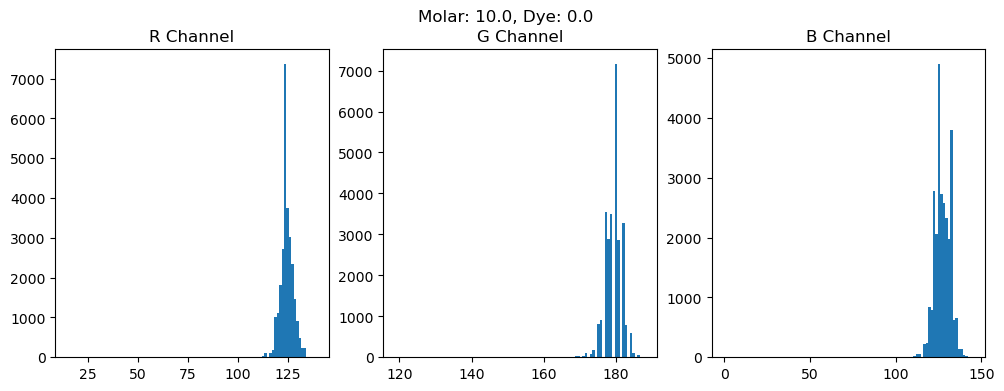

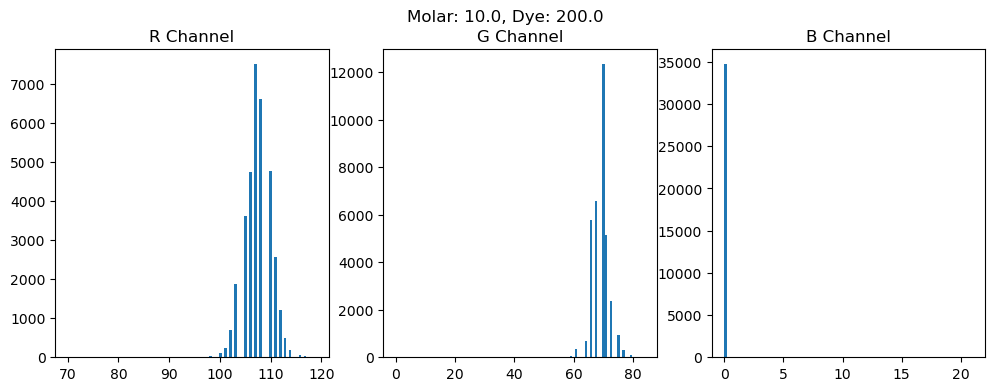

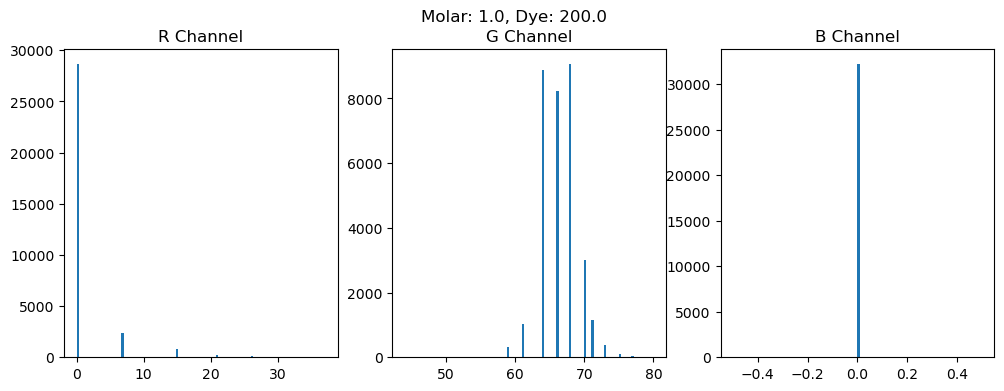

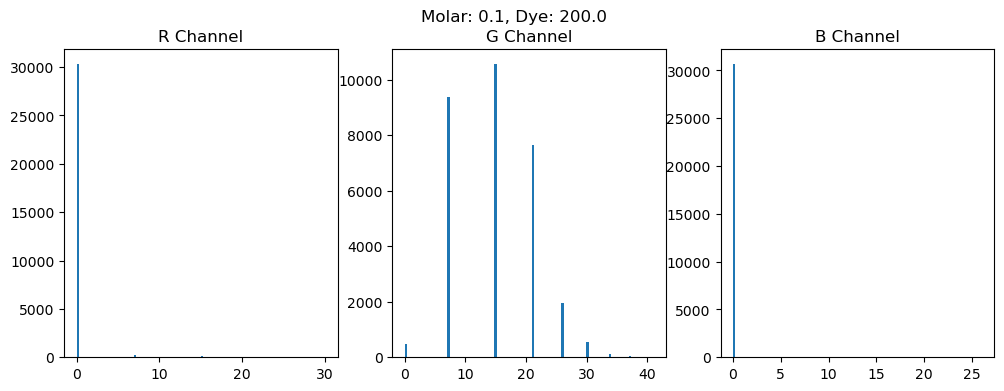

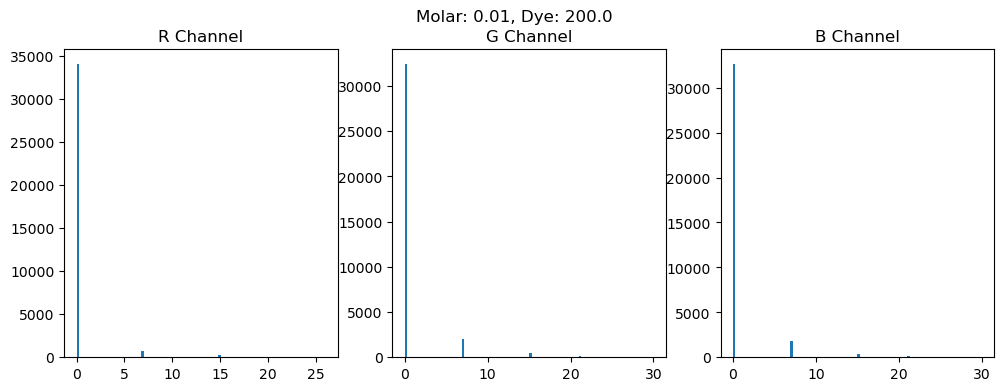

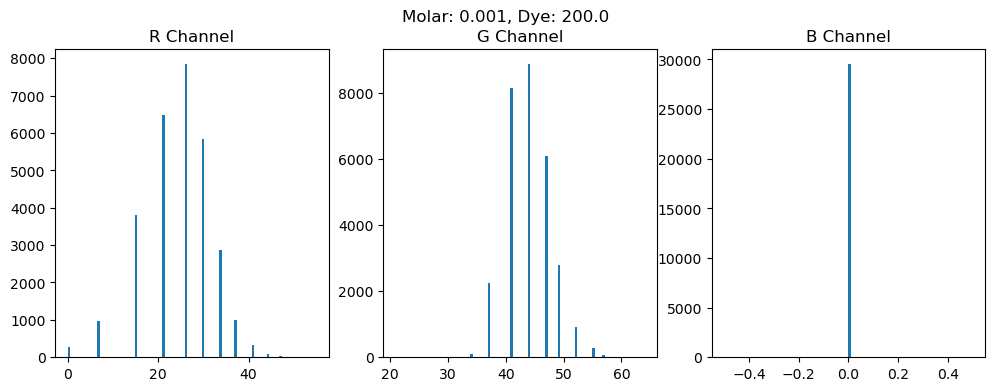

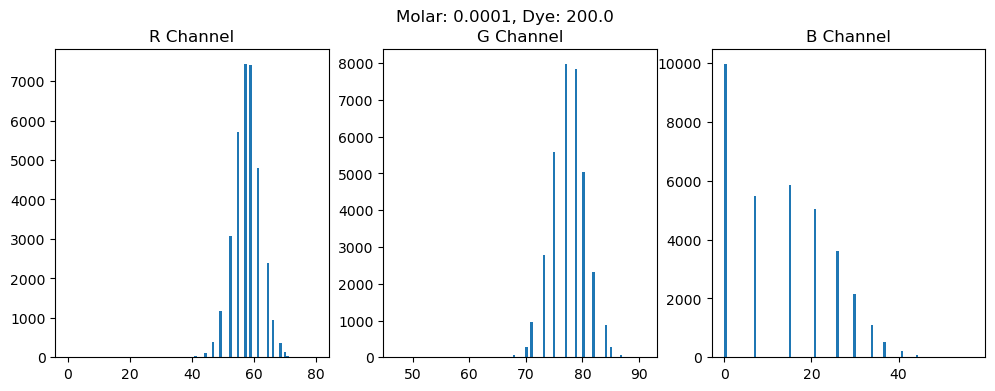

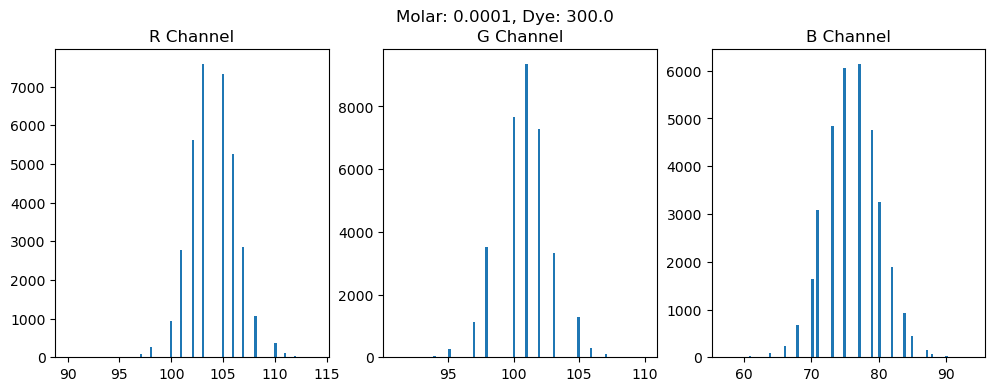

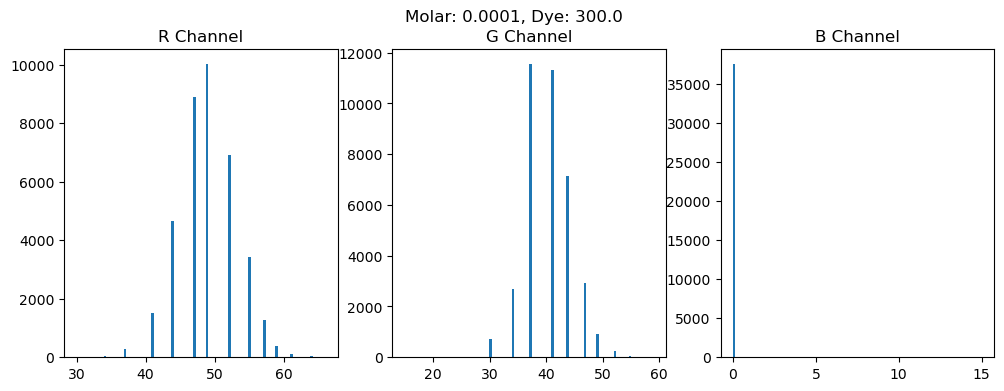

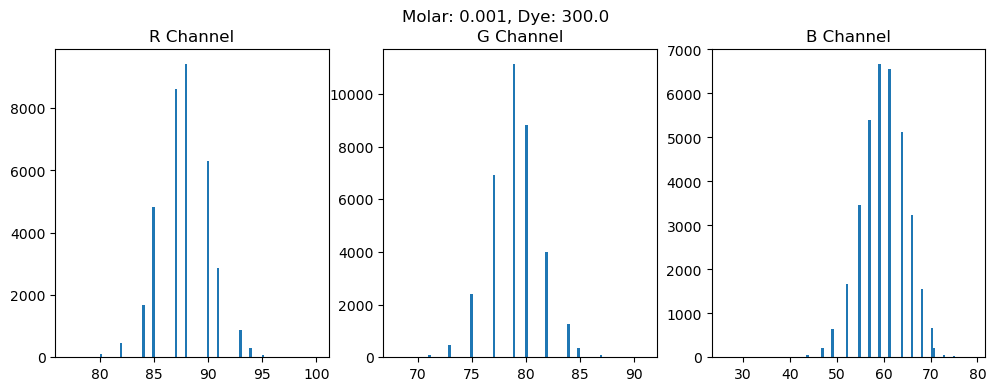

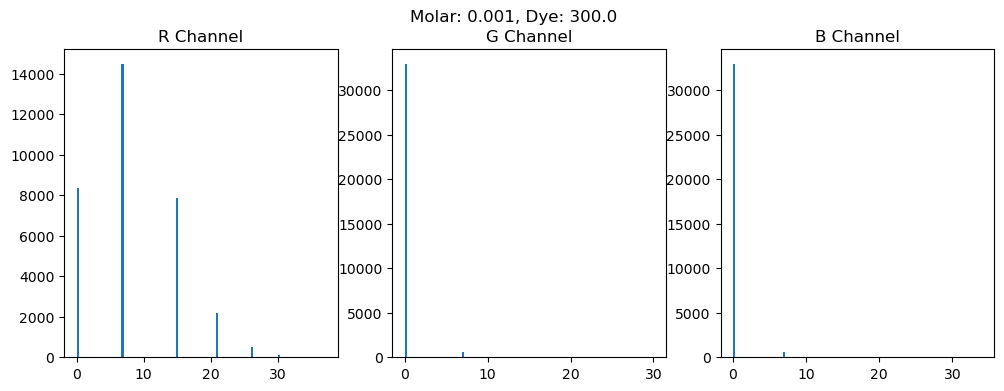

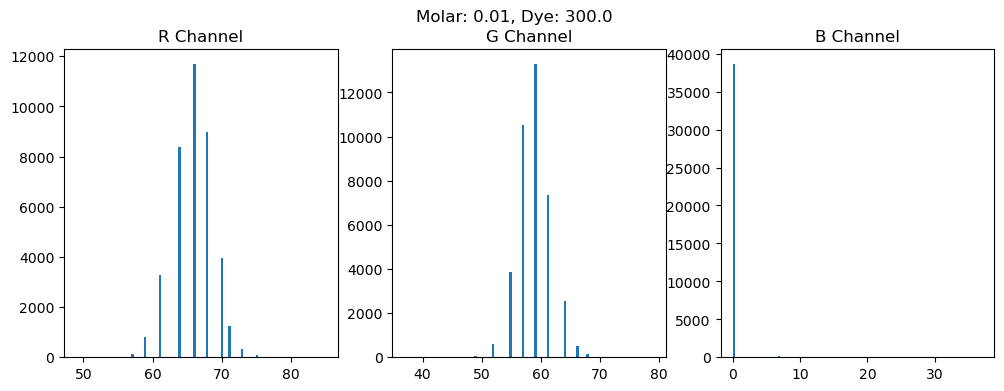

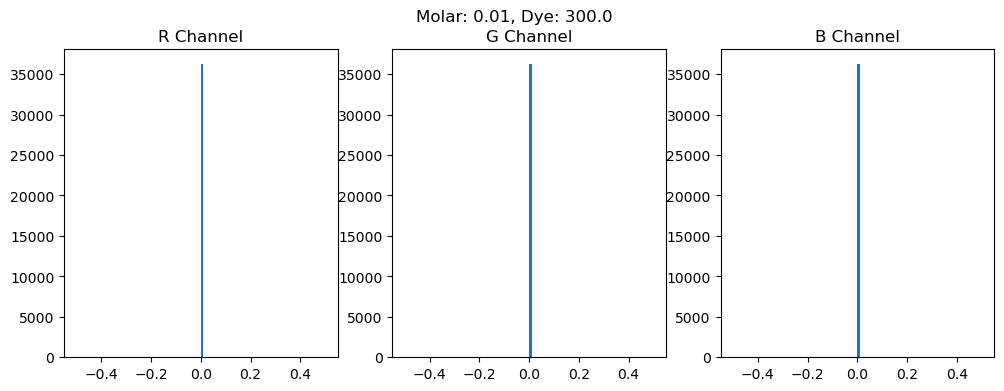

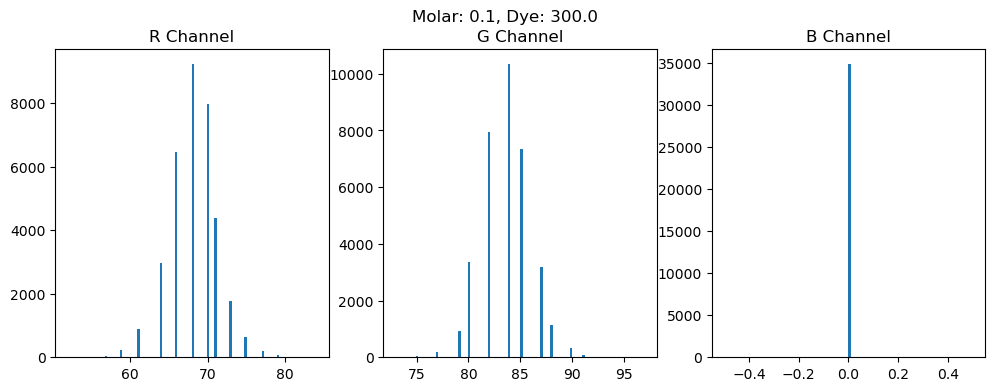

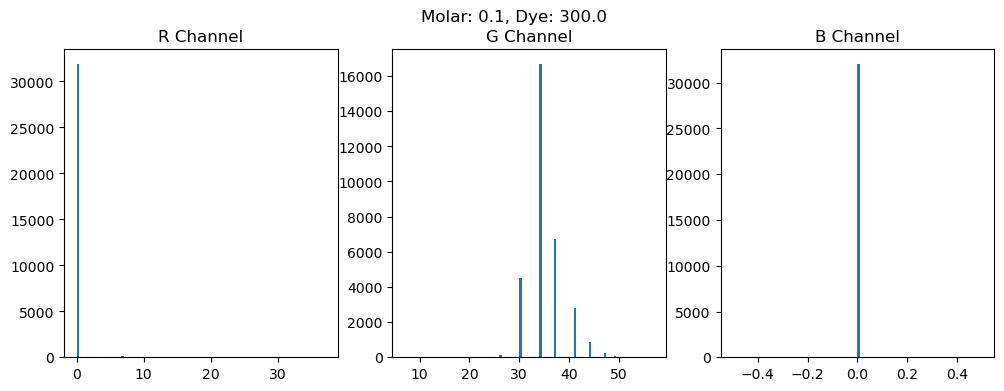

In [15]:
rstat = {}
gstat = {}
bstat = {}
rdist = {}
gdist = {}
bdist = {}
for i in range(len(res_df)):
    filename = res_df['Sample'].iloc[i]
    img = cv2.imread(out_path + "/" + filename + ".tif").astype(np.float32)
    b = img[:,:, 0]
    g = img[:,:, 1]
    r = img[:,:, 2]
    rdist[filename] = r
    gdist[filename] = g
    bdist[filename] = b
    rstat[filename] = [np.mean(r), np.median(r), statistics.mode(r.flatten()), np.min(r), np.max(r), np.std(r)]
    gstat[filename] = [np.mean(g), np.median(g), statistics.mode(g.flatten()), np.min(g), np.max(g), np.std(g)]
    bstat[filename] = [np.mean(b), np.median(b), statistics.mode(b.flatten()), np.min(b), np.max(b), np.std(b)]
    title = f"Molar: {res_df['Molar'].iloc[i]}, Dye: {res_df['Dye'].iloc[i]}"
    plot_hist([r, g, b], title)

# Build Results

In [16]:
cols = ['Mean', 'Median', 'Mode', 'Min', 'Max', 'Std']
r_df = pd.DataFrame.from_dict(rstat, orient='index', columns=["R_" + col for col in cols])
g_df = pd.DataFrame.from_dict(gstat, orient='index', columns=["G_" + col for col in cols])
b_df = pd.DataFrame.from_dict(bstat, orient='index', columns=["B_" + col for col in cols])

In [18]:
final_df = pd.concat([res_df.set_index('Sample'), r_df, g_df, b_df], axis=1)
final_df = final_df.reset_index().rename(columns={'index': 'Sample'})
final_df.to_csv("30_05_2025_Results.csv")

In [19]:
final_df

,Sample,Molar,Dye,R_Mean,R_Median,R_Mode,R_Min,R_Max,R_Std,G_Mean,...,G_Mode,G_Min,G_Max,G_Std,B_Mean,B_Median,B_Mode,B_Min,B_Max,B_Std
0,006,10.0000,0.0,124.241020,124.0,124.0,15.0,139.0,3.454721,179.369675,...,180.0,119.0,188.0,2.436151,127.285416,127.0,127.0,0.0,145.0,4.648324
1,007,10.0000,200.0,107.465698,107.0,107.0,70.0,119.0,2.664686,69.280472,...,70.0,0.0,84.0,2.781267,0.000806,0.0,0.0,0.0,21.0,0.118795
2,008,1.0000,200.0,1.187380,0.0,0.0,0.0,37.0,3.847057,66.437363,...,68.0,44.0,80.0,2.642302,0.000000,0.0,0.0,0.0,0.0,0.000000
3,010,0.1000,200.0,0.131107,0.0,0.0,0.0,30.0,1.288305,14.893272,...,15.0,0.0,41.0,6.773448,0.017381,0.0,0.0,0.0,26.0,0.487674
4,012,0.0100,200.0,0.283413,0.0,0.0,0.0,26.0,1.812275,0.708804,...,0.0,0.0,30.0,2.760706,0.673937,0.0,0.0,0.0,30.0,2.790157
5,014,0.0010,200.0,24.803419,26.0,26.0,0.0,55.0,7.453679,44.077862,...,44.0,21.0,64.0,3.830644,0.000000,0.0,0.0,0.0,0.0,0.000000
6,016,0.0001,200.0,57.662304,57.0,57.0,0.0,80.0,4.299626,77.594894,...,77.0,47.0,91.0,3.078031,13.554277,15.0,0.0,0.0,57.0,11.547375
7,022,0.0001,300.0,104.021507,103.0,103.0,90.0,114.0,2.283544,100.899734,...,101.0,91.0,110.0,1.900650,76.121269,77.0,77.0,57.0,94.0,4.085448
8,023,0.0001,300.0,48.996330,49.0,49.0,30.0,66.0,4.119670,40.383060,...,37.0,15.0,59.0,4.218798,0.000958,0.0,0.0,0.0,15.0,0.099473
9,024,0.0010,300.0,87.844185,88.0,88.0,77.0,100.0,2.321525,79.083122,...,79.0,68.0,91.0,2.284159,60.132626,59.0,59.0,26.0,79.0,4.744866


# Exploratory Data Analysis

## RGB Plot for 200 Molar

In [20]:
Samples = list(res_df[res_df['Dye'] == 200]['Sample'])
Molars = list(res_df[res_df['Dye'] == 200]['Molar'])   

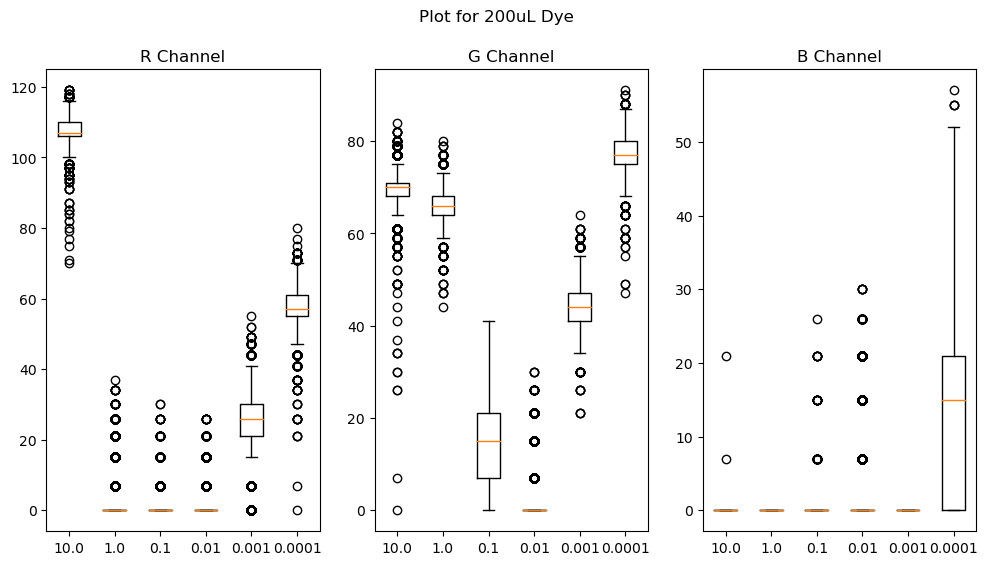

In [21]:
plt.figure(figsize=(12,6)).suptitle("Plot for 200uL Dye")
plt.subplot(1,3,1)
filtered_dict = {k: v.flatten() for k, v in rdist.items() if k in Samples}
plt.boxplot(filtered_dict.values(), labels=Molars)
plt.title('R Channel')
plt.subplot(1,3,2)
filtered_dict = {k: v.flatten() for k, v in gdist.items() if k in Samples}
plt.boxplot(filtered_dict.values(), labels=Molars)
plt.title('G Channel')

plt.subplot(1,3,3)
filtered_dict = {k: v.flatten() for k, v in bdist.items() if k in Samples}
plt.boxplot(filtered_dict.values(), labels=Molars)
plt.title('B Channel')
plt.show()

## RGB Plot for 400 Molar

In [27]:
# Samples = list(res_df[res_df['Dye'] == 400]['Sample'])
# Molars = list(res_df[res_df['Dye'] == 400]['Molar'])   

In [ ]:
# plt.figure(figsize=(12,6)).suptitle("Plot for 400uL Dye")
# plt.subplot(1,3,1)
# filtered_dict = {k: v.flatten() for k, v in rdist.items() if k in Samples}
# plt.boxplot(filtered_dict.values(), labels=Molars)
# plt.title('R Channel')
# plt.subplot(1,3,2)
# filtered_dict = {k: v.flatten() for k, v in gdist.items() if k in Samples}
# plt.boxplot(filtered_dict.values(), labels=Molars)
# plt.title('G Channel')
# plt.subplot(1,3,3)
# filtered_dict = {k: v.flatten() for k, v in bdist.items() if k in Samples}
# plt.boxplot(filtered_dict.values(), labels=Molars)
# plt.title('B Channel')
# plt.show()

## Statistical Analysis of RGB Plot 300 Molar

In [22]:
def plot_channels(df, dye, typ, fig_title = "", fig = None, c='b'):    
    def_cols = ['Molar']
    part_cols = [col for col in list(df.columns) if typ.lower() in col.lower()]
    part_df = df[df['Dye'] == dye][def_cols + part_cols]
#     if fig is None:
    fig = plt.figure(figsize=(12,4)).suptitle(fig_title)
    plt.subplot(1,3,1)
    plt.plot(np.log10(part_df['Molar'].astype(np.float32)), part_df.iloc[:, -3], 'o', color = c)
    plt.title("R Channel")
    plt.subplot(1,3,2)
    plt.plot(np.log10(part_df['Molar'].astype(np.float32)), part_df.iloc[:, -2], 'o', color = c)
    plt.title("G Channel")
    plt.subplot(1,3,3)
    plt.plot(np.log10(part_df['Molar'].astype(np.float32)), part_df.iloc[:, -1], 'o', color = c)
    plt.title("B Channel")
#     return fig

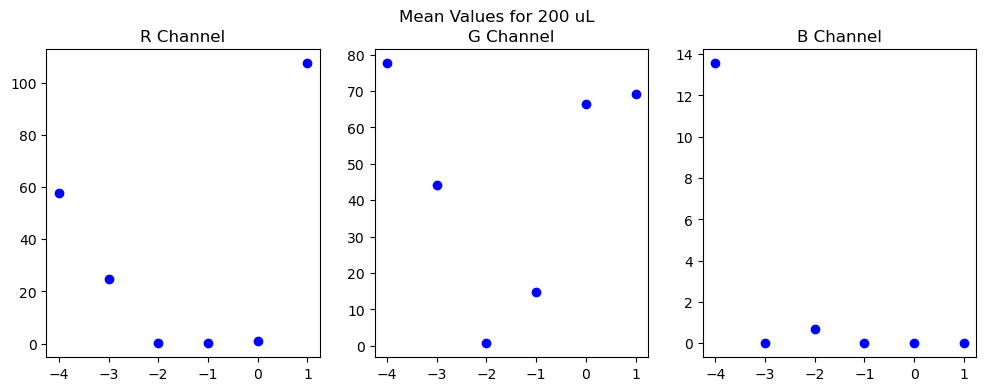

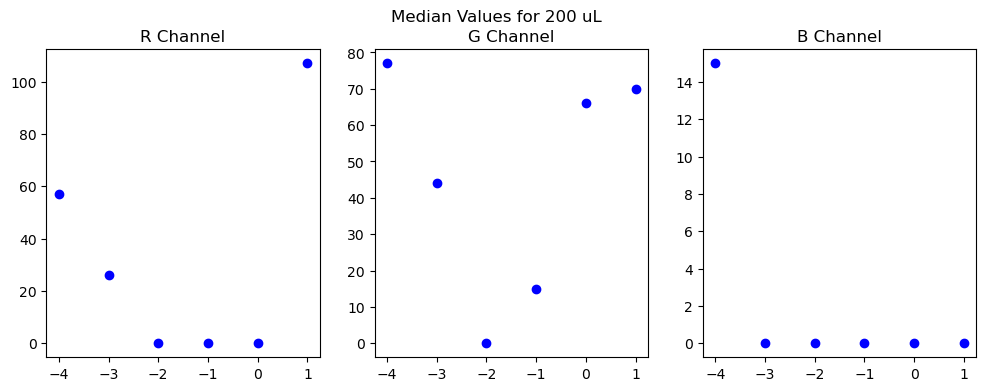

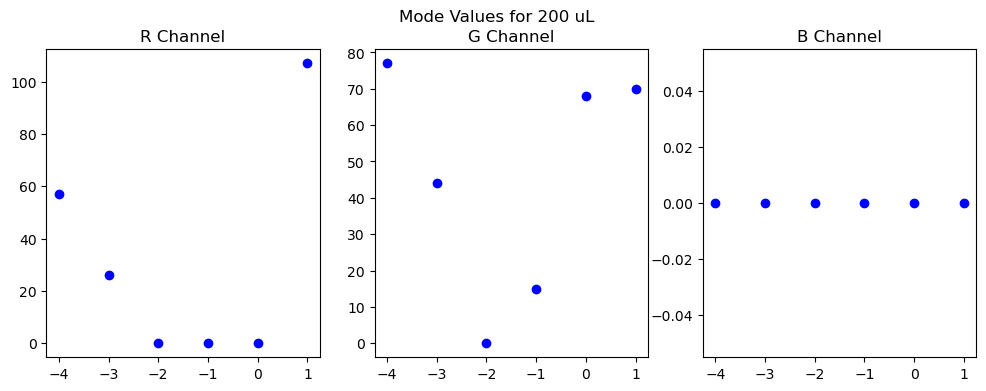

In [24]:
plot_channels(final_df, 200, 'mean', fig_title = "Mean Values for 200 uL")
plot_channels(final_df, 200, 'median', fig_title = "Median Values for 200 uL")
plot_channels(final_df, 200, 'mode', fig_title = "Mode Values for 200 uL")

## Statistical Analysis of RGB Plot 400 Molar

In [ ]:
plot_channels(final_df, 400, 'mean', fig_title = "Mean Values for 400 uL")
plot_channels(final_df, 400, 'median', fig_title = "Median Values for 400 uL")
plot_channels(final_df, 400, 'mode', fig_title = "Mode Values for 400 uL")

In [150]:
## Statistical Analysis of RGB Plot 400 Molar
plot_channels(final_df, 400, 'mean', fig_title = "Mean Values for 400 uL")
plot_channels(final_df, 400, 'median', fig_title = "Median Values for 400 uL")
plot_channels(final_df, 400, 'mode', fig_title = "Mode Values for 400 uL")

008    10.0000
010     1.0000
012     0.1000
015     0.0100
024     0.0010
025     0.0001
Name: Molar, dtype: float32

In [25]:
def calc_eucledian(df):
    mean_cols = [col for col in list(df.columns) if 'mean' in col.lower()]
    mean_values = df[mean_cols]
    mean_mat = df[mean_cols].to_numpy()
    mean_dist = []
    min_dist = []
    for i in range(mean_mat.shape[0]):
        dist = np.sqrt(np.sum((mean_mat - mean_mat[i]) ** 2, axis=1))
        mean_dist.append(np.mean(dist))
        min_dist.append(sorted(dist)[1])
    return mean_dist, min_dist

In [26]:
df_200 = final_df[final_df['Dye'] == 200]
# df_400 = final_df[final_df['Dye'] == 400]

mean_dist, min_dist = calc_eucledian(df_200)
df_200.loc[:, 'Mean_Distance'] = mean_dist
df_200.loc[:, 'Nearest_Distance'] = min_dist

# mean_dist, min_dist = calc_eucledian(df_400)
# df_400.loc[:, 'Mean_Distance'] = mean_dist
# df_400.loc[:, 'Nearest_Distance'] = min_dist

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10248\1028059334.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_200.loc[:, 'Mean_Distance'] = mean_dist
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10248\1028059334.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_200.loc[:, 'Nearest_Distance'] = min_dist


In [32]:
labels = df_200.sort_values(by = 'Molar')['Molar']
values1 = df_200.sort_values(by = 'Molar')['Nearest_Distance']  # e.g., Mean R values
values2 = df_200.sort_values(by = 'Molar')['Nearest_Distance']  # e.g., Mean G values

In [33]:
print(list(values2))

[48.85505676269531, 32.52175521850586, 14.200471878051758, 14.200471878051758, 32.52175521850586, 52.28005599975586]


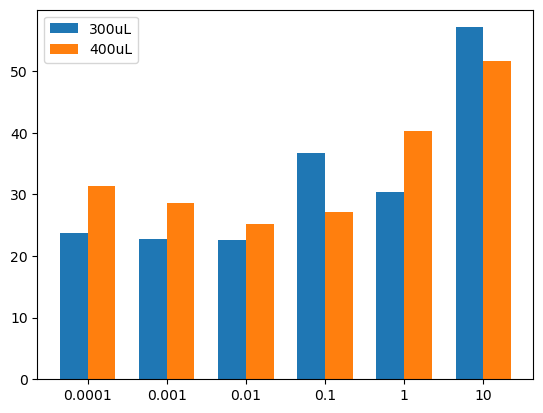

In [86]:
labels = df_200.sort_values(by = 'Molar')['Molar']
values1 = df_200.sort_values(by = 'Molar')['Mean_Distance']  # e.g., Mean R values
values2 = df_200.sort_values(by = 'Molar')['Mean_Distance']  # e.g., Mean G values

x = np.arange(len(labels))  # label locations
width = 0.35  # width of the bars

# Plotting
fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, values1, width, label='300uL')
bars2 = ax.bar(x + width/2, values2, width, label='400uL')
ax.set_xticks(x)
ax.set_xticklabels(list(labels))
ax.legend()

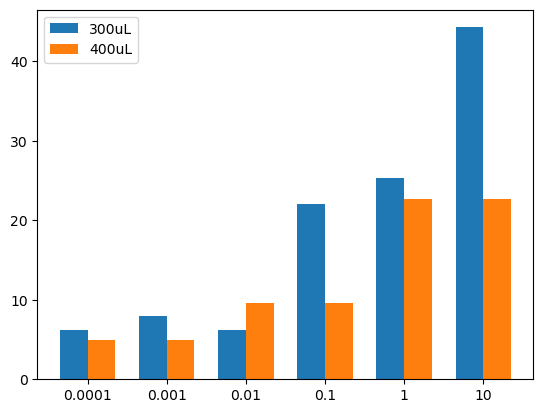

In [89]:
labels = df_300.sort_values(by = 'Molar')['Molar']
values1 = df_300.sort_values(by = 'Molar')['Nearest_Distance']  # e.g., Mean R values
values2 = df_400.sort_values(by = 'Molar')['Nearest_Distance']  # e.g., Mean G values

x = np.arange(len(labels))  # label locations
width = 0.35  # width of the bars

# Plotting
fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, values1, width, label='300uL')
bars2 = ax.bar(x + width/2, values2, width, label='400uL')
ax.set_xticks(x)
ax.set_xticklabels(list(labels))
ax.legend()

In [90]:
df_300[['Molar', 'Mean_Distance', 'Nearest_Distance']]

,Molar,Mean_Distance,Nearest_Distance
1,10,57.100415,44.276027
2,1,30.318098,25.345530
3,0.1,36.752230,22.037513
4,0.01,22.626043,6.192760
9,0.001,22.770122,7.970024
10,0.0001,23.751471,6.192760


In [91]:
df_400[['Molar', 'Mean_Distance', 'Nearest_Distance']]

,Molar,Mean_Distance,Nearest_Distance
5,10,51.626438,22.626960
6,1,40.256093,22.626960
7,0.1,27.203963,9.573739
8,0.01,25.247754,9.573739
11,0.001,28.660884,4.879187
12,0.0001,31.366905,4.879187
